In [3]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

from queries import (algtn_by_area_qstr,
                     algtn_by_race_qstr,
                     algtn_by_race_and_gender_qstr,
                     officer_population_by_race_qster,
                     algtn_by_officer_id_qster)
from cp4 import dp_execute_sql_query, execute_sql_query, compute_epsilon

meta_path = "cpdb.yaml"
cpdb = psycopg2.connect(user="postgres", host="localhost", database="cpdb")

def execute_query_and_plot(query, epsilons=[]):
    _, n_allegation = execute_sql_query(cpdb, query)[0]
    result = []
    for epsilon in epsilons:
        err_array = []
        exec_time_array = []
        for _ in range(10):
            dp_result, exec_time = dp_execute_sql_query(cpdb, meta_path, query, epsilon)
            _, n_allegation_dp = dp_result[1]
            error = n_allegation_dp - n_allegation
            err_array.append(error)
            exec_time_array.append(exec_time)
        
        result.append([err_array, exec_time_array, epsilon])
    
    err_for_plot, time_for_plot, epsilon_for_plot = [], [], []
    for err_array, exec_time_array, epsilon in result:
        err_for_plot.append(err_array)
        time_for_plot.append(exec_time_array)
        epsilon_for_plot.append(epsilon)

    _, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))
    for x, y in zip(epsilon_for_plot, err_for_plot):
        ax1.set_xlabel('Epsilon')
        ax1.set_ylabel('Error')
        ax1.scatter([x] * len(y), y, color='#1f77b4')

    for x, y in zip(epsilon_for_plot, time_for_plot):
        ax2.set_xlabel('Epsilon')
        ax2.set_ylabel('Execution Time (s)')
        ax2.scatter([x] * len(y), y, color='#1f77b4')

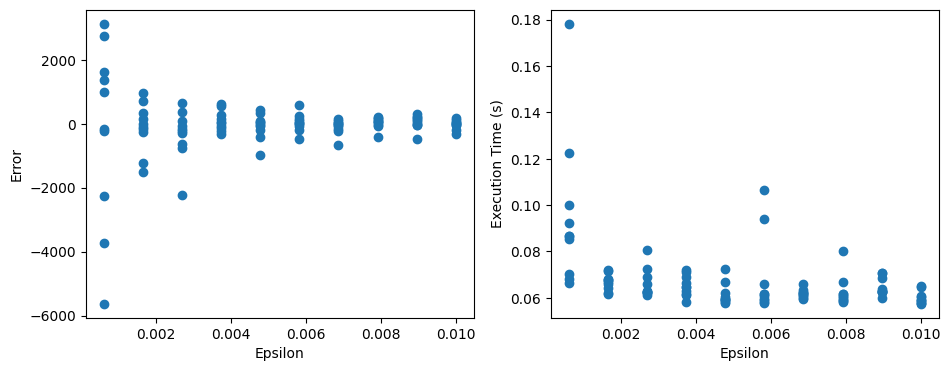

In [51]:
execute_query_and_plot(algtn_by_area_qstr, np.linspace(0.0006, 0.01, 10))

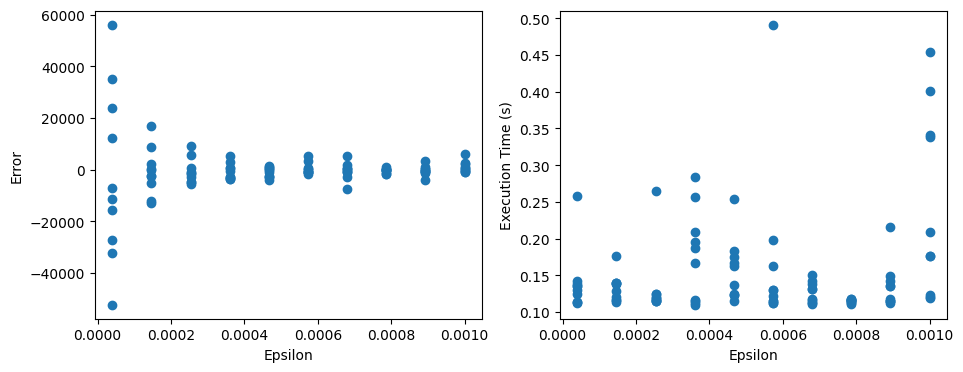

In [53]:
execute_query_and_plot(algtn_by_race_qstr, np.linspace(0.00004, 0.001, 10))

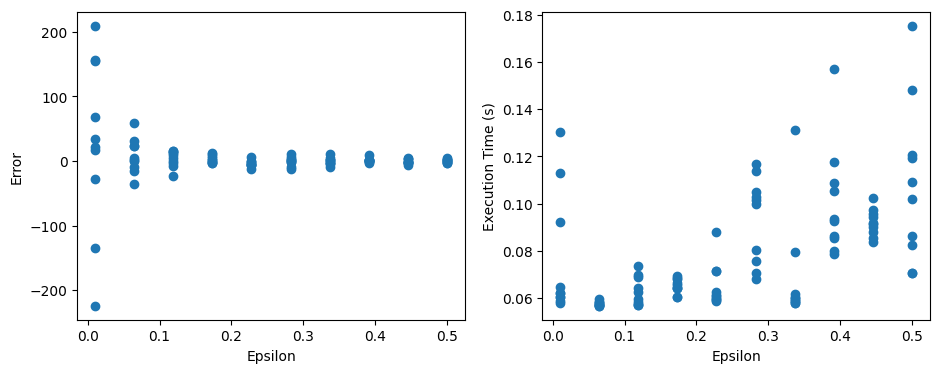

In [49]:
execute_query_and_plot(algtn_by_race_and_gender_qstr, np.linspace(0.01, 0.5, 10))

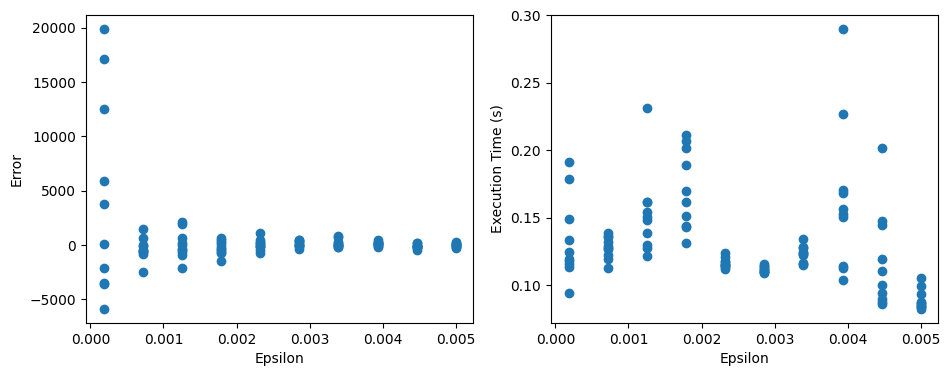

In [61]:
execute_query_and_plot(officer_population_by_race_qster, np.linspace(0.00018, 0.005, 10))

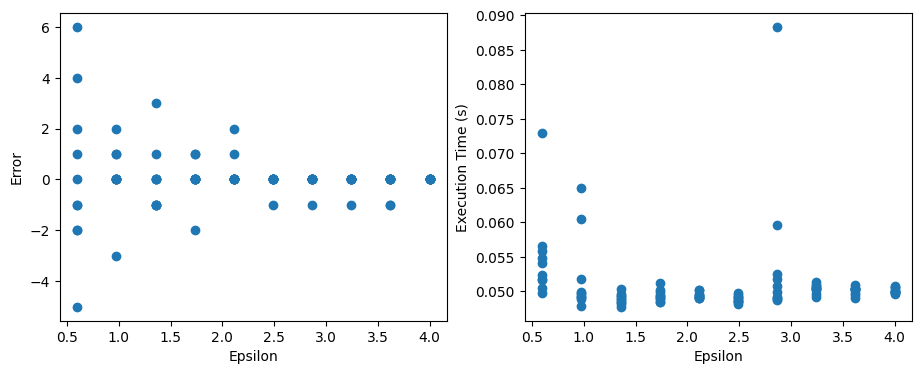

In [34]:
execute_query_and_plot(algtn_by_officer_id_qster, np.linspace(0.6, 4, 10))